In [1]:
import csv
import numpy as np
import pandas as pd
df = pd.read_csv('C:\\Users\\nimesh.j\\OneDrive - Mu Sigma Business Solutions Pvt. Ltd\\Desktop\\The Home Depot\\Data Analysis\\train.csv')
print("Data Imported")

Data Imported


In [2]:
# print(df.head())
print(df.describe())
print(df.head())
print(df.info())

                age  days_since_last_login  avg_time_spent  \
count  36992.000000           36992.000000    36992.000000   
mean      37.118161             -41.915576      243.472334   
std       15.867412             228.819900      398.289149   
min       10.000000            -999.000000    -2814.109110   
25%       23.000000               8.000000       60.102500   
50%       37.000000              12.000000      161.765000   
75%       51.000000              16.000000      356.515000   
max       64.000000              26.000000     3235.578521   

       avg_transaction_value  points_in_wallet  churn_risk_score  
count           36992.000000      33549.000000      36992.000000  
mean            29271.194003        686.882199          3.463397  
std             19444.806226        194.063624          1.409661  
min               800.460000       -760.661236         -1.000000  
25%             14177.540000        616.150000          3.000000  
50%             27554.485000        697

Based on the data columns you provided, here is a list of columns with missing data:

1. **region_category** - 3,564 missing values
2. **preferred_offer_types** - 288 missing values
3. **points_in_wallet** - 3,443 missing values

These columns have missing values that you may need to handle during your data preprocessing.

In [3]:
# check duplicates of security number in the datafarme
duplicates = df.duplicated('security_no')

for x in duplicates:
    if x == True:
        print("Duplicate Found")



No duplicates found for security_no

In [4]:
# check duplicates of customer number in the datafarme
duplicates = df.duplicated('customer_id')

for x in duplicates:
    if x == True:
        print("Duplicate Found")

#no duplicates found for security_no

In [5]:
#check for null values in the dataframe column region_category

null_values = df['region_category'].isnull().sum()
print(null_values, "null values in the region_category column")

#we have 8376 null values in the region_category column

8376 null values in the region_category column


In [6]:
#check for null values in the dataframe column region_category

null_values = df['preferred_offer_types'].isnull().sum()
print(null_values, "null values in the preferred_offer_types column")

#we have 447 null values in the preferred_offer_types column


#check for null values in the dataframe column points_in_wallet

null_values = df['points_in_wallet'].isnull().sum()
print(null_values, "null values in the points_in_wallet column")

#we have 5406 null values in the points_in_wallet column

447 null values in the preferred_offer_types column
5406 null values in the points_in_wallet column


In [7]:
# check duplicates of referral id in the datafarme

grouped_customers = df.groupby('referral_id')
for referral_id, group in grouped_customers:
    if(len(group) > 10):
        print("Referral ID:", referral_id," count:", len(group))

#no duplicates found for security_no

Referral ID: CID15792  count: 11
Referral ID: CID22424  count: 11
Referral ID: CID23523  count: 12
Referral ID: CID3979  count: 12
Referral ID: CID42099  count: 11
Referral ID: CID43428  count: 11
Referral ID: CID43705  count: 13
Referral ID: CID49598  count: 12
Referral ID: CID49601  count: 12
Referral ID: CID51723  count: 11
Referral ID: CID56219  count: 12
Referral ID: CID63748  count: 12
Referral ID: CID9129  count: 12
Referral ID: xxxxxxxx  count: 27300


In [8]:
categorical_columns = [
    'gender', 'region_category', 'membership_category',
    'joined_through_referral', 'preferred_offer_types', 
    'medium_of_operation', 'internet_option', 'used_special_discount', 
    'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback'
]

# Create a dictionary with column names and their unique values
categorical_dict = {col: df[col].unique().tolist() for col in categorical_columns}

unique_values_dict = {}
value_counts_dict = {}

# Process each categorical column
for column in categorical_columns:
    if column in df.columns:
        # Get unique values for the column
        unique_values = df[column].dropna().unique()
        unique_values_dict[column] = unique_values
        
        # Count occurrences of each unique value
        value_counts = df[column].value_counts(dropna=True)
        value_counts_dict[column] = value_counts

# Print the results
for column, unique_values in unique_values_dict.items():
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

for column, counts in value_counts_dict.items():
    print(f"Value counts for column '{column}':")
    print(counts)

Unique values in column 'gender':
['F' 'M' 'Unknown']

Unique values in column 'region_category':
['Village' 'City' 'Town']

Unique values in column 'membership_category':
['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership']

Unique values in column 'joined_through_referral':
['No' '?' 'Yes']

Unique values in column 'preferred_offer_types':
['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers']

Unique values in column 'medium_of_operation':
['?' 'Desktop' 'Smartphone' 'Both']

Unique values in column 'internet_option':
['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']

Unique values in column 'used_special_discount':
['Yes' 'No']

Unique values in column 'offer_application_preference':
['Yes' 'No']

Unique values in column 'past_complaint':
['No' 'Yes']

Unique values in column 'complaint_status':
['Not Applicable' 'Solved' 'Solved in Follow-up' 'Unsolved'
 'No Information Available']

Unique values in column 'feedb


### Data Cleaning- joined_through_referral
Replace the `'?'` values in the `joined_through_referral` column with `'Yes'` or `'No'` based on the conditions related to the `referral_id` column by using the following code:

1. **Condition for Replacement**: 
   - If `referral_id` is `'xxxxxxxx'` or empty (`''`), the value in `joined_through_referral` is set to `'No'`.
   - Otherwise, if the value in `joined_through_referral` is `'?'`, it is set to `'Yes'`.
2. **`apply` Function**: Used with a lambda function to iterate through each row and make the necessary replacements.
3. **Verification**: The `value_counts()` function will show how many `'Yes'`, `'No'`, and other values are in the `joined_through_referral` column after replacement.

This code ensures that all `'?'` values are appropriately replaced based on the `referral_id` conditions.

In [9]:


df['joined_through_referral'] = df.apply(
    lambda row: 'No' if row['referral_id'] == 'xxxxxxxx' or row['referral_id'] == '' else 'Yes' 
    if row['joined_through_referral'] == '?' else row['joined_through_referral'],
    axis=1
)

In [18]:
import numpy as np
df['region_category'] = df.apply(
    lambda row: 'Unknown' if pd.isna(row['region_category']) else row['region_category'],
    axis=1
)

In [19]:
df['medium_of_operation'] = df.apply(
    lambda row: 'Unknown' if row['medium_of_operation'] == '?' else row['medium_of_operation'],
    axis=1
)

In [21]:
df['preferred_offer_types'] = df.apply(
    lambda row: 'Unknown' if pd.isna(row['preferred_offer_types']) else row['preferred_offer_types'],
    axis=1
)

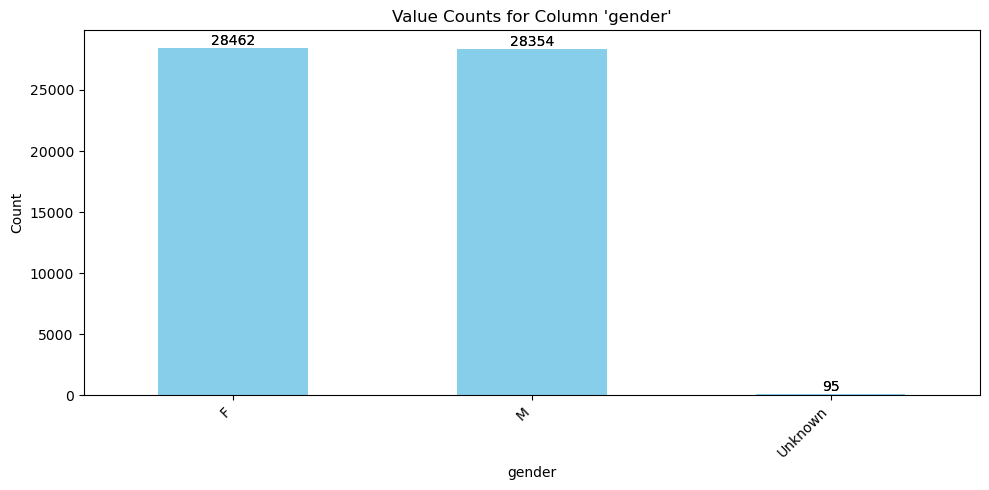

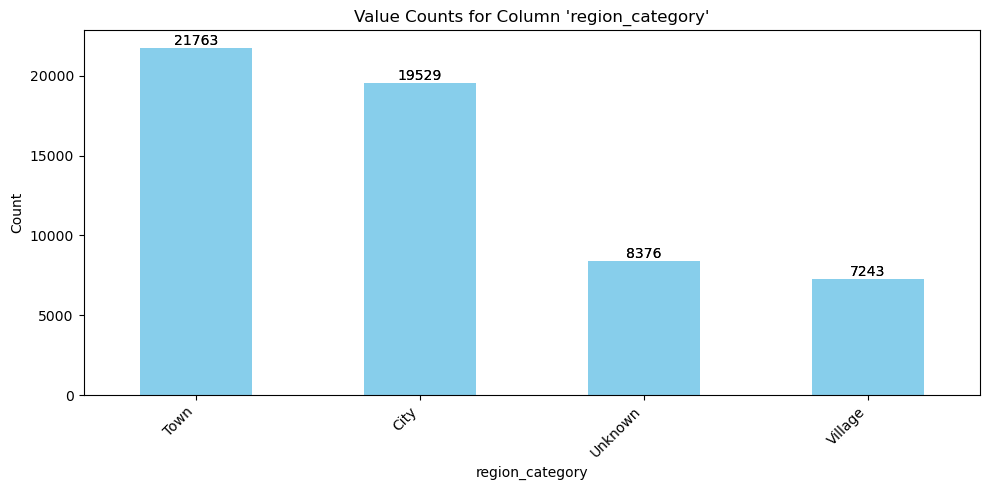

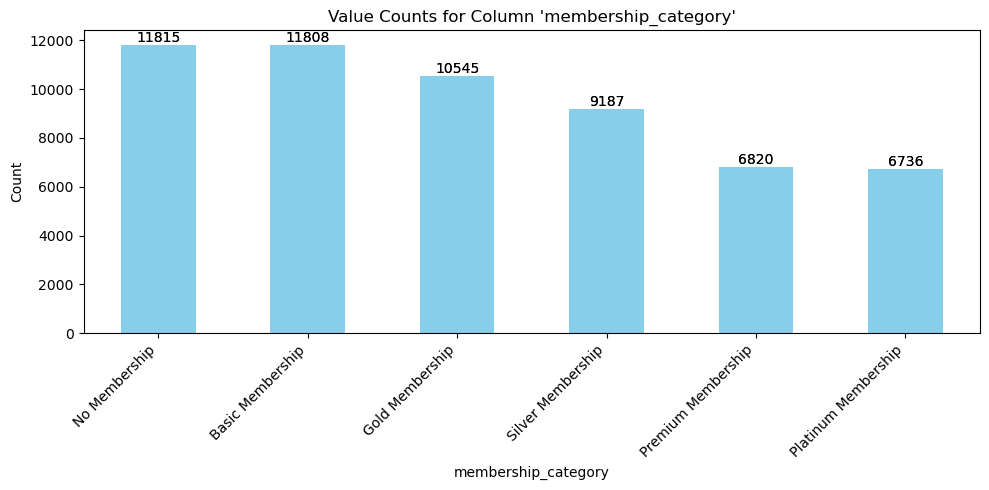

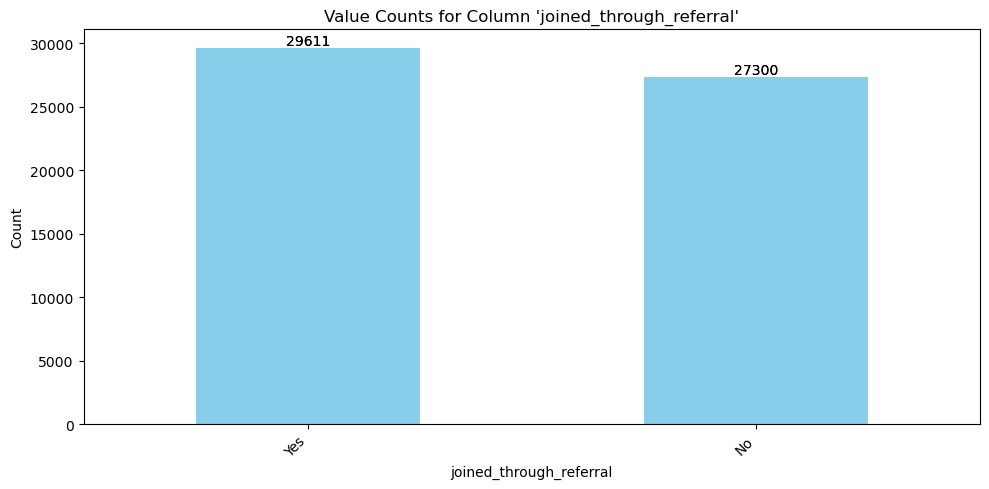

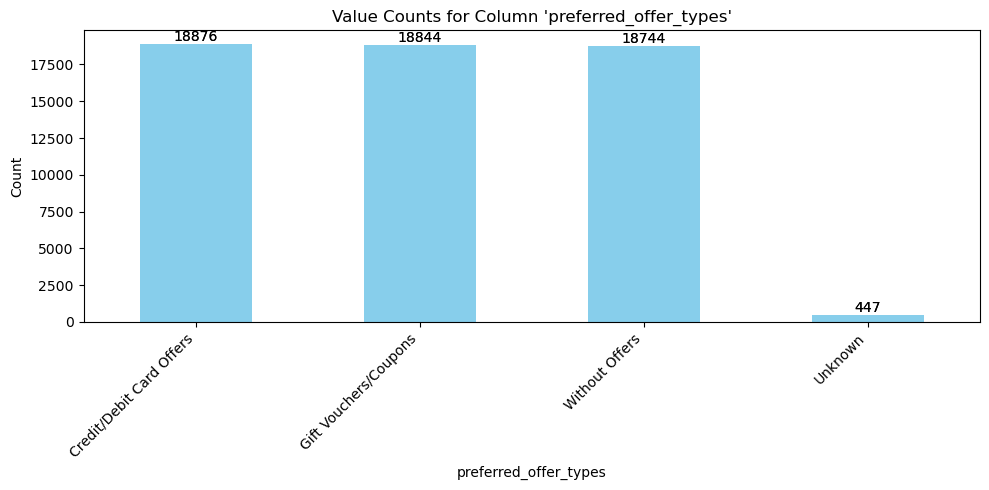

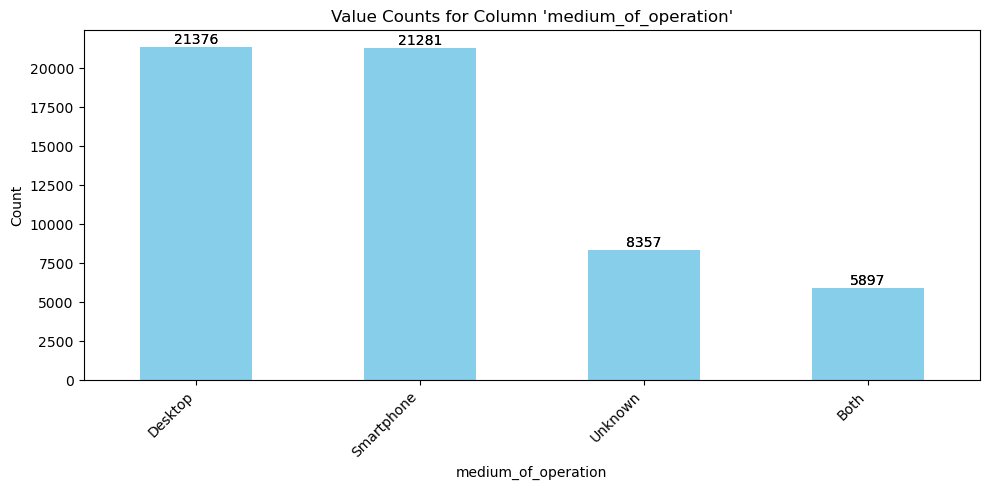

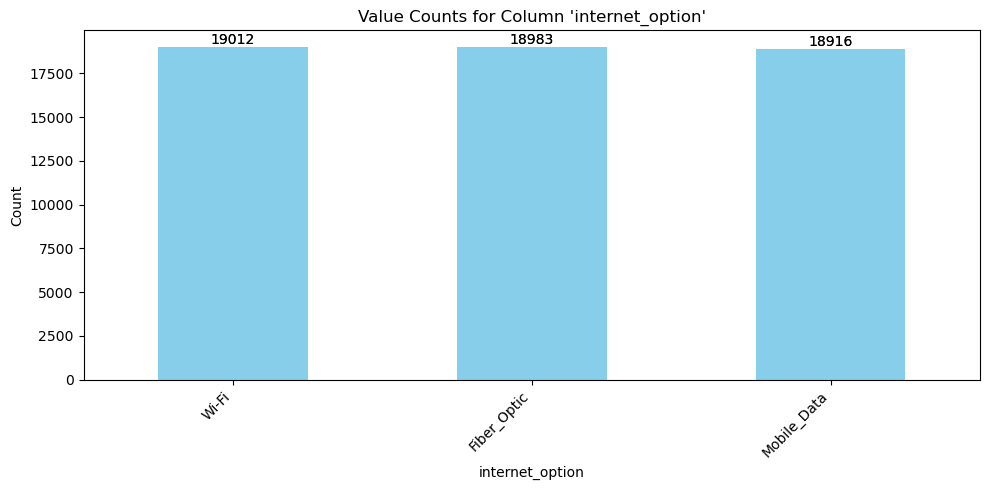

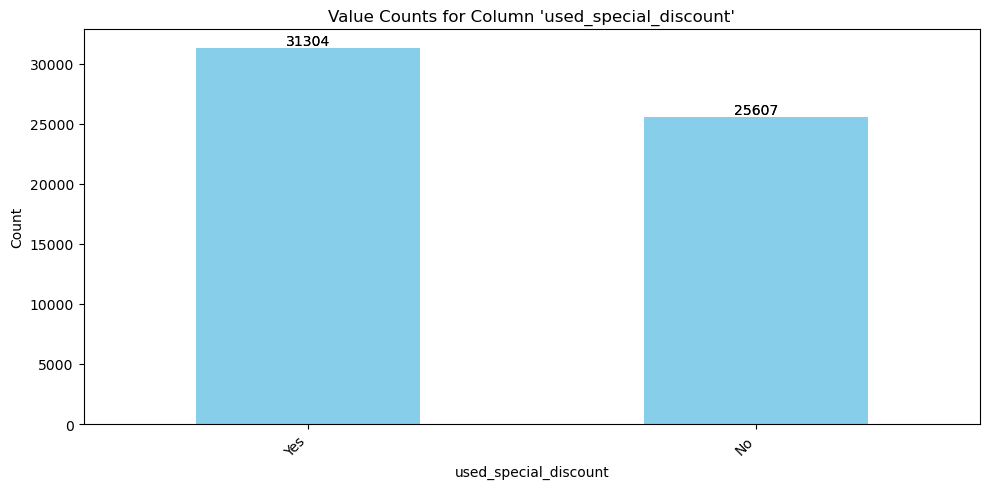

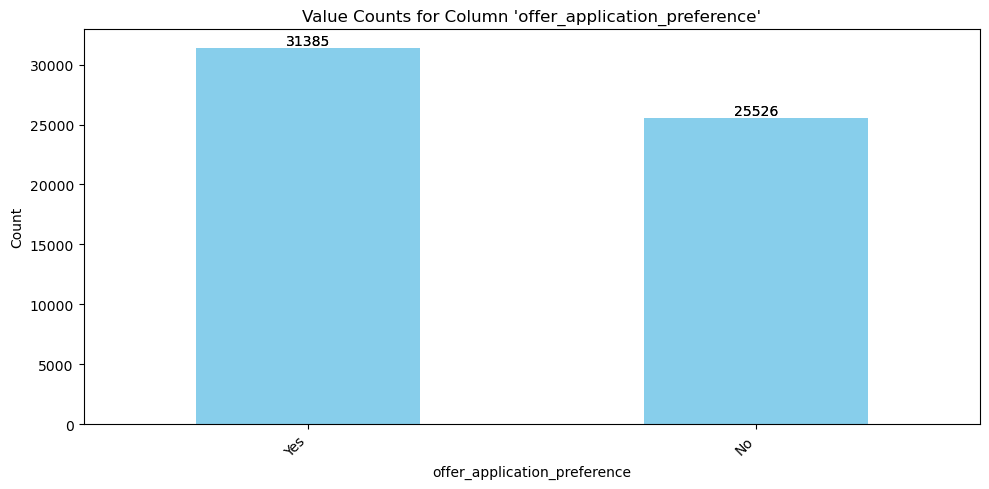

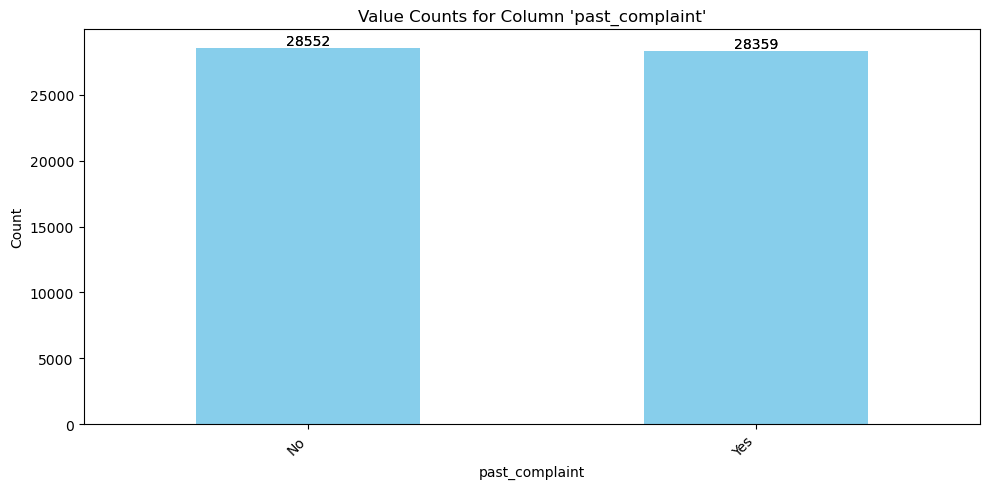

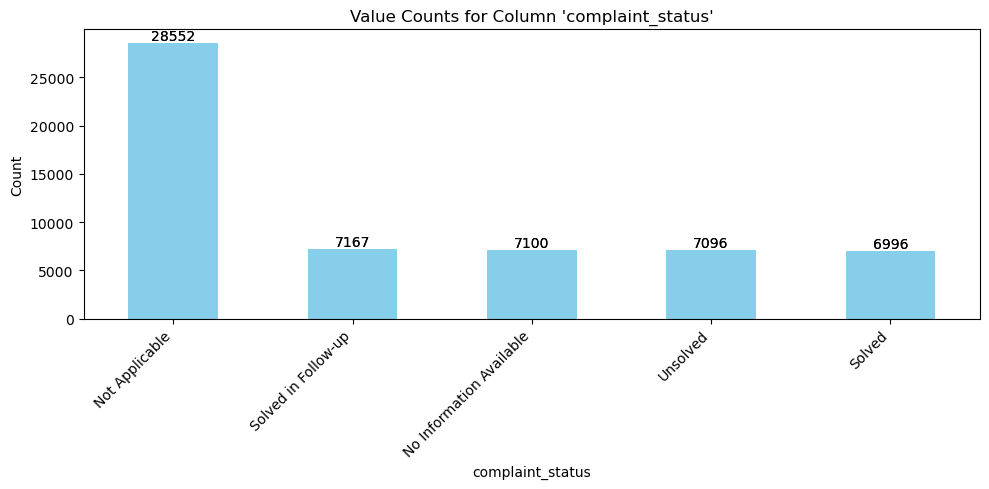

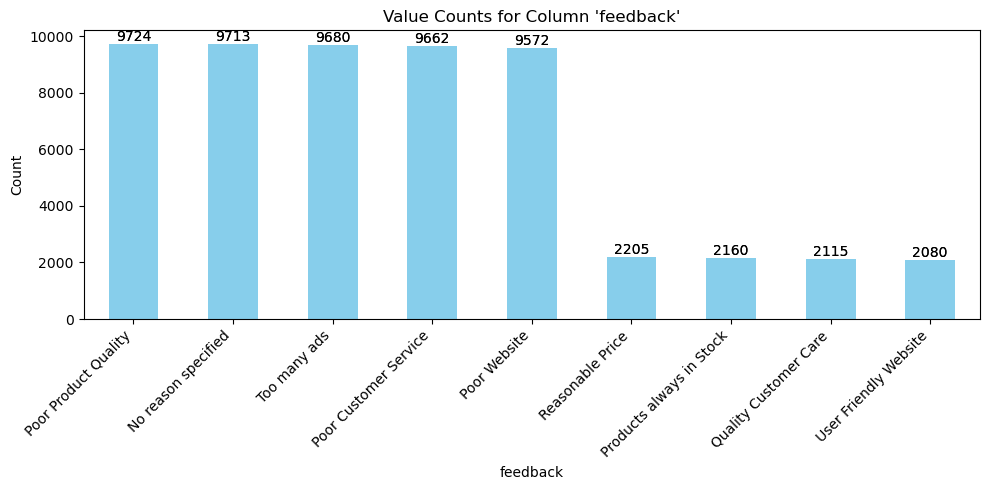

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming value_counts_dict is already defined and contains the value counts for each column
value_counts_dict = {
    'gender': df['gender'].value_counts(),
    'region_category': df['region_category'].value_counts(),
    'membership_category': df['membership_category'].value_counts(),
    'joined_through_referral': df['joined_through_referral'].value_counts(),
    'preferred_offer_types': df['preferred_offer_types'].value_counts(),
    'medium_of_operation': df['medium_of_operation'].value_counts(),
    'internet_option': df['internet_option'].value_counts(),
    'used_special_discount': df['used_special_discount'].value_counts(),
    'offer_application_preference': df['offer_application_preference'].value_counts(),
    'past_complaint': df['past_complaint'].value_counts(),
    'complaint_status': df['complaint_status'].value_counts(),
    'feedback': df['feedback'].value_counts()
}

# Plotting the graphs
for column, counts in value_counts_dict.items():
    plt.figure(figsize=(10, 5))
    counts.plot(kind='bar', color='skyblue')
    ax = counts.plot(kind='bar', color='skyblue')
    plt.title(f"Value Counts for Column '{column}'")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10)
    plt.tight_layout()
    plt.show()


In [15]:
print(df['region_category'])
region_category_values = set(df['region_category'])
print(region_category_values)

0        Village
1           City
2           Town
3           City
4           City
          ...   
56906        NaN
56907    Village
56908       Town
56909       City
56910       Town
Name: region_category, Length: 56911, dtype: object
{nan, 'Town', 'Village', 'City'}
